### Libraries and Modules

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io, restoration, filters
from PIL import Image

# Modules
from RICM_VESICLE import RICM, Growth_Area

### Determine the movie details

In [2]:
EXPERIMENT  = '20220513_GUV_NTA3_on_SOPC3'           # Experiment name
DATA        = 'Substack'                             # Image name
frames      = '7001-10000'                             # Range of frames
dt          = 0.538                                  # Actual time interval in seconds

### Read the RICM image for one GUV

In [3]:
# Read the image
movie_guv = io.imread(f'Data/{EXPERIMENT}/data/{DATA} ({frames}).tif')

# Subtract the base line
movie_guv = movie_guv - movie_guv[-100:-1].mean(axis = 0).min()

# # Take the average
# movie_guv_avg = movie_guv[-20:].mean(axis = 0)

# # Define the RICM class with certain n_inner
# ricm = RICM(movie_guv_avg, n_inner = 1.344, hole = 2)

# # Display the way to the RICM height mapping step by step
# ricm.show_summary()

In [4]:
background_fitting = io.imread(f'Data/{EXPERIMENT}/data/{DATA} ({frames}).tif')

### Measure the area of each frame

In [5]:
# read the background
background_fitting = io.imread(f'Data/{EXPERIMENT}/data/background_fitting.tif')

# Define the growth area curve
growth = Growth_Area(movie_guv, background=background_fitting, denoise=True, static_threshold=False, consecute=20)
area = growth.area_curve()

(3000, 585, 576) --> (2980, 585, 576)


### Plot the growth curve

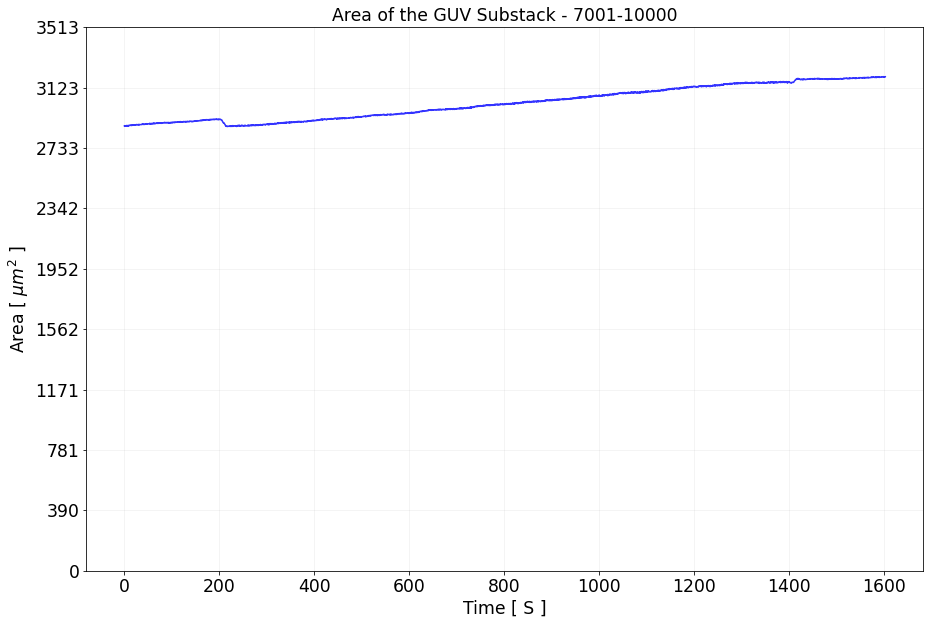

In [6]:
# Define the curve and the time interval
area_curve = area * 0.125**2
time = np.arange(0, area_curve.shape[0]*dt, dt)

# Define data frame for the scaled time and area
df1 = pd.DataFrame(data={'Time':time, 'Area':area_curve})

# Drop the ill-defined area points
df = df1.iloc[:,:]

# Plot the curve
plt.figure(figsize=(15, 10))

plt.plot(df['Time'], df['Area'], label = f'{DATA}_{frames}', color = 'b', alpha = 0.8)

plt.title(f'Area of the GUV {DATA} - {frames}', fontsize= 'xx-large')
plt.xlabel('Time [ S ]', fontsize = 'xx-large')
plt.ylabel('Area [ $\mu m^2$ ]', fontsize = 'xx-large')
plt.xticks(fontsize = 'xx-large')
plt.yticks(np.linspace(0, 1.1*area_curve[:].max(),10), fontsize = 'xx-large')
plt.ylim(0, np.max(df['Area']) * 1.1) 
plt.grid(color = 'gray', alpha = 0.1)

# Save the figure into png
plt.savefig(f'Data/{EXPERIMENT}/results/{DATA}-{frames}')

# Save the data into csv
df.to_csv(f'Data/{EXPERIMENT}/results/{DATA}-{frames}.csv', index=False)

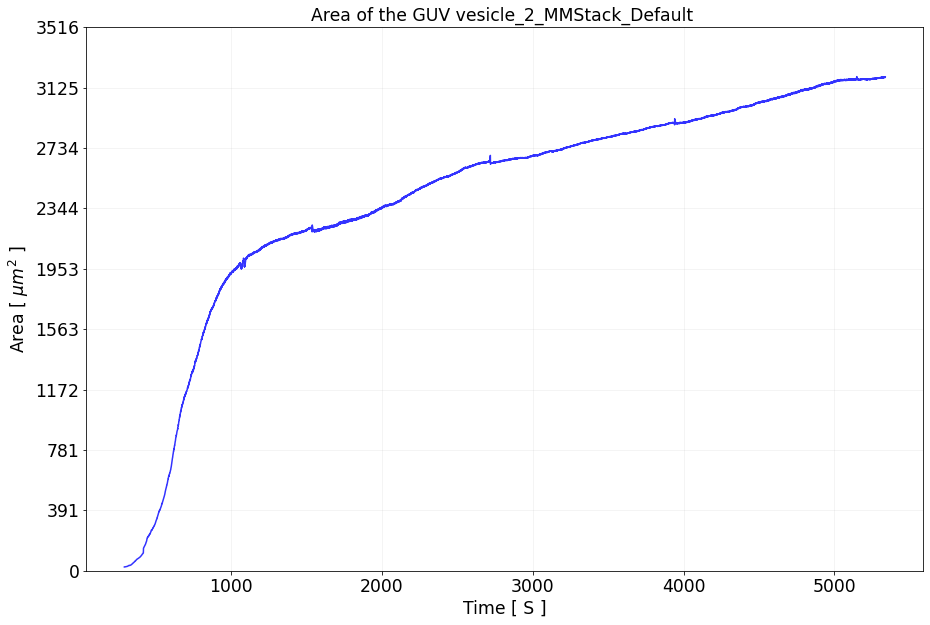

In [2]:
# Read the data frames
df1 = pd.read_csv('Data/20220513_GUV_NTA3_on_SOPC3/results/Substack-1-800.csv')
df2 = pd.read_csv('Data/20220513_GUV_NTA3_on_SOPC3/results/Substack-801-4000.csv')
df3 = pd.read_csv('Data/20220513_GUV_NTA3_on_SOPC3/results/Substack-4001-7000.csv')
df4 = pd.read_csv('Data/20220513_GUV_NTA3_on_SOPC3/results/Substack-7001-10000.csv')

# Shift the time of late data frames
df2['Time'] = df2['Time'].values + df1['Time'].values[-1] + 0.538 
df3['Time'] = df3['Time'].values + df2['Time'].values[-1] + 0.538
df4['Time'] = df4['Time'].values + df3['Time'].values[-1] + 0.538

# Concat all the dataframes
df = pd.concat([df1, df2, df3, df4])

# Clean the curve
df['Area'].values[2315:4510] = df['Area'].values[2315:4510] + 45
df['Area'].values[4511:6780] = df['Area'].values[4511:6780] - 20
df['Area'].values[6780:9025] = df['Area'].values[6780:9025] + 20


# Plot the curve
plt.figure(figsize=(15, 10))

plt.plot(df['Time'].values, df['Area'].values, label = 'vesicle_2_MMStack_Default', color = 'b', alpha = 0.8)

plt.title(f'Area of the GUV vesicle_2_MMStack_Default ', fontsize= 'xx-large')
plt.xlabel('Time [ S ]', fontsize = 'xx-large')
plt.ylabel('Area [ $\mu m^2$ ]', fontsize = 'xx-large')
plt.xticks(fontsize = 'xx-large')
plt.yticks(np.linspace(0, 1.1*df['Area'].values[:].max(),10), fontsize = 'xx-large')
plt.ylim(0, np.max(df['Area']) * 1.1) 
plt.grid(color = 'gray', alpha = 0.1)

# Save the figure into png
plt.savefig(f'Data/20220513_GUV_NTA3_on_SOPC3/results/vesicle_2_MMStack_Default')

# Save the data into csv
df.to_csv(f'Data/20220513_GUV_NTA3_on_SOPC3/results/vesicle_2_MMStack_Default.csv', index=False)